In [95]:
import pandas as pd

In [96]:
df = pd.read_csv("hf://datasets/erwanlc/cocktails_recipe_no_brand/train.csv")

In [97]:
df.head()

,title,glass,garnish,recipe,ingredients,raw_ingredients
0,Abacaxi Ricaço,Pineapple shell (frozen) glass,Cut a straw sized hole in the top of the pinea...,Cut the top off a small pineapple and carefull...,"[['1 whole', 'pineapple'], ['9 cl', 'Havana Cl...","[['1 whole', 'pineapple'], ['9 cl', 'white rum..."
1,Abbey,Coupe glass,Orange zest twist,SHAKE all ingredients with ice and fine strain...,"[['4.5 cl', 'Rutte Dry Gin'], ['2.25 cl', 'Lil...","[['4.5 cl', 'gin'], ['2.25 cl', 'lillet blanc'..."
2,A.B.C. Cocktail,Nick & Nora glass,Lemon zest twist & Luxardo Maraschino cherry,TEAR mint and place in shaker. Add other ingre...,"[['7 fresh', 'Mint leaves'], ['3 cl', 'Tawny p...","[['7 fresh', 'mint leaves'], ['3 cl', 'tawny p..."
3,Absinthe Cocktail,Coupe glass,Mint leaf,SHAKE all ingredients with ice and fine strain...,"[['3 cl', 'La Fée Parisienne absinthe'], ['7.5...","[['3 cl', 'absinthe'], ['7.5 cl', 'chilled wat..."
4,Absinthe Frappé,Old-fashioned glass,Mint sprig,SHAKE all ingredients with ice and fine strain...,"[['4.5 cl', 'La Fée Parisienne absinthe'], ['1...","[['4.5 cl', 'absinthe'], ['1.5 cl', 'anisette ..."


In [98]:
df.describe()

,title,glass,garnish,recipe,ingredients,raw_ingredients
count,6956,6956,6667,6955,6956,6956
unique,6880,46,2482,2973,6928,6886
top,Margarita (frozen),Coupe glass,Orange zest twist,SHAKE all ingredients with ice and fine strain...,"[['4.5 cl', 'Patrón Silver blanco tequila'], [...","[['7.5 cl', 'gin'], ['1.5 cl', 'dry vermouth']]"
freq,3,2209,691,1522,3,3


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            6956 non-null   object
 1   glass            6956 non-null   object
 2   garnish          6667 non-null   object
 3   recipe           6955 non-null   object
 4   ingredients      6956 non-null   object
 5   raw_ingredients  6956 non-null   object
dtypes: object(6)
memory usage: 326.2+ KB


In [100]:
df.isnull().sum()

title                0
glass                0
garnish            289
recipe               1
ingredients          0
raw_ingredients      0
dtype: int64

In [101]:
print(df[df.duplicated(subset='title')])


                                           title                glass  \
668                          Elderflower Collins        Collins glass   
1208                          Margarita (frozen)          Coupe glass   
1331                      Hotel Nacional Special          Coupe glass   
1413                                    Paradise          Coupe glass   
1625                            Rob Roy Cocktail          Coupe glass   
...                                          ...                  ...   
6670                                 Poison Dart  Old-fashioned glass   
6706                                  Man O' War  Old-fashioned glass   
6769  Peter's Corpse Reviver No.2 (Savoy Recipe)          Coupe glass   
6851                           Twelve Mile Limit  Old-fashioned glass   
6872                               French Gimlet          Coupe glass   

                                                garnish  \
668   Elderflowers when in season (or lemon slice / ...   
1208 

In [102]:
df = df.drop_duplicates(subset = 'title')

In [103]:
df.head()

,title,glass,garnish,recipe,ingredients,raw_ingredients
0,Abacaxi Ricaço,Pineapple shell (frozen) glass,Cut a straw sized hole in the top of the pinea...,Cut the top off a small pineapple and carefull...,"[['1 whole', 'pineapple'], ['9 cl', 'Havana Cl...","[['1 whole', 'pineapple'], ['9 cl', 'white rum..."
1,Abbey,Coupe glass,Orange zest twist,SHAKE all ingredients with ice and fine strain...,"[['4.5 cl', 'Rutte Dry Gin'], ['2.25 cl', 'Lil...","[['4.5 cl', 'gin'], ['2.25 cl', 'lillet blanc'..."
2,A.B.C. Cocktail,Nick & Nora glass,Lemon zest twist & Luxardo Maraschino cherry,TEAR mint and place in shaker. Add other ingre...,"[['7 fresh', 'Mint leaves'], ['3 cl', 'Tawny p...","[['7 fresh', 'mint leaves'], ['3 cl', 'tawny p..."
3,Absinthe Cocktail,Coupe glass,Mint leaf,SHAKE all ingredients with ice and fine strain...,"[['3 cl', 'La Fée Parisienne absinthe'], ['7.5...","[['3 cl', 'absinthe'], ['7.5 cl', 'chilled wat..."
4,Absinthe Frappé,Old-fashioned glass,Mint sprig,SHAKE all ingredients with ice and fine strain...,"[['4.5 cl', 'La Fée Parisienne absinthe'], ['1...","[['4.5 cl', 'absinthe'], ['1.5 cl', 'anisette ..."


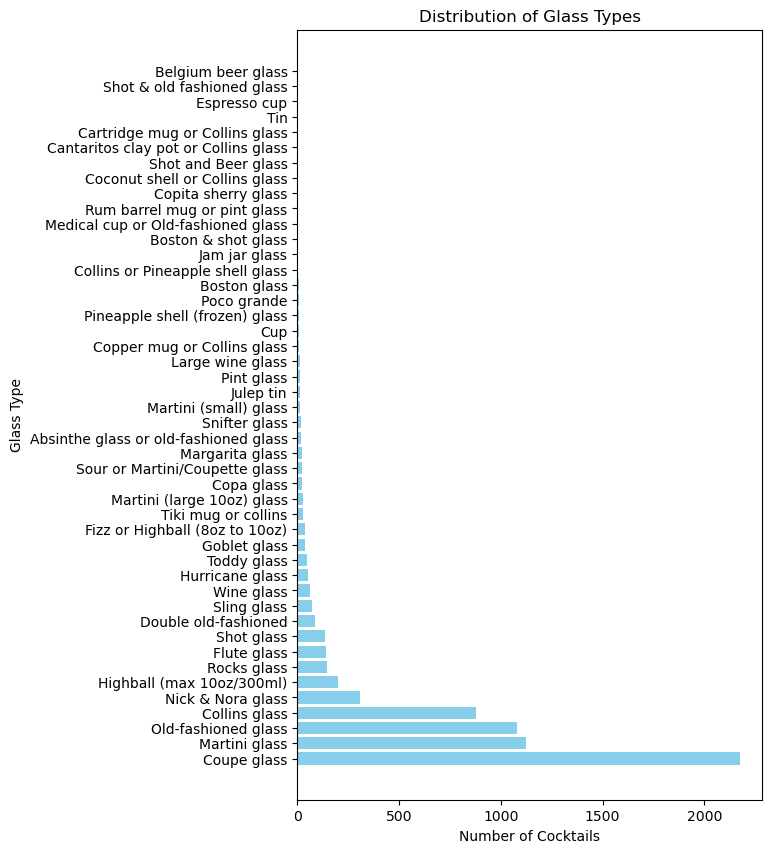

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

glass_counts = df['glass'].value_counts()

plt.figure(figsize = (6,10))
plt.barh(glass_counts.index, glass_counts.values, color='skyblue')
plt.xlabel('Number of Cocktails')
plt.ylabel('Glass Type', fontsize=10)
plt.title('Distribution of Glass Types')
plt.show()


In [105]:
import ast

df['raw_ingredients'] = df['raw_ingredients'].apply(ast.literal_eval)

ingredients = [ingredient[1] for sublist in df['raw_ingredients'] for ingredient in sublist]


In [106]:
df['raw_ingredients'][0]

[['1 whole', 'pineapple'],
 ['9 cl', 'white rum'],
 ['2.25 cl', 'lime juice'],
 ['1.5 cl', 'white sugar']]

In [107]:
from collections import Counter

ingredient_counts = Counter(ingredients)
top_ingredients = ingredient_counts.most_common(20)
ingredients, counts = zip(*top_ingredients)


<BarContainer object of 20 artists>

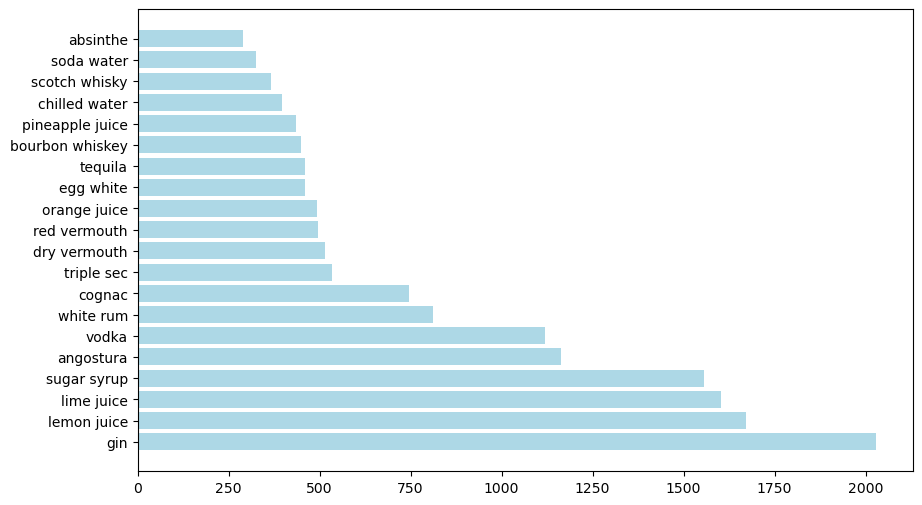

In [108]:
plt.figure(figsize=(10,6))
plt.barh(ingredients, counts, color='lightblue')


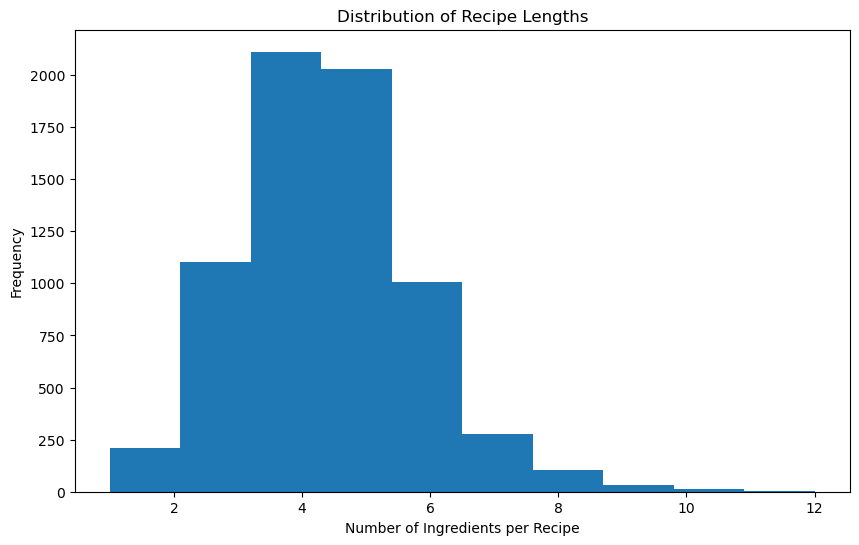

In [114]:
df['recipe_length'] = df['raw_ingredients'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['recipe_length'])
plt.xlabel('Number of Ingredients per Recipe')
plt.ylabel('Frequency')
plt.title('Distribution of Recipe Lengths')
plt.show()

In [121]:
co_occurrences = pd.DataFrame(0, index=ingredient_counts.keys(), columns=ingredient_counts.keys())
for sublist in df['raw_ingredients']:
    for i in range(len(sublist)):
        for j in range(i + 1, len(sublist)):
            ingredient1 = sublist[i][1].strip().lower()
            ingredient2 = sublist[j][1].strip().lower()
            co_occurrences.at[ingredient1, ingredient2] += 1
            co_occurrences.at[ingredient2, ingredient1] += 1


In [126]:
total_cooccurrences = co_occurrences.sum(axis=1)
top_20_ingredients = total_cooccurrences.nlargest(20).index
truncated_matrix = co_occurrences.loc[top_20_ingredients, top_20_ingredients]


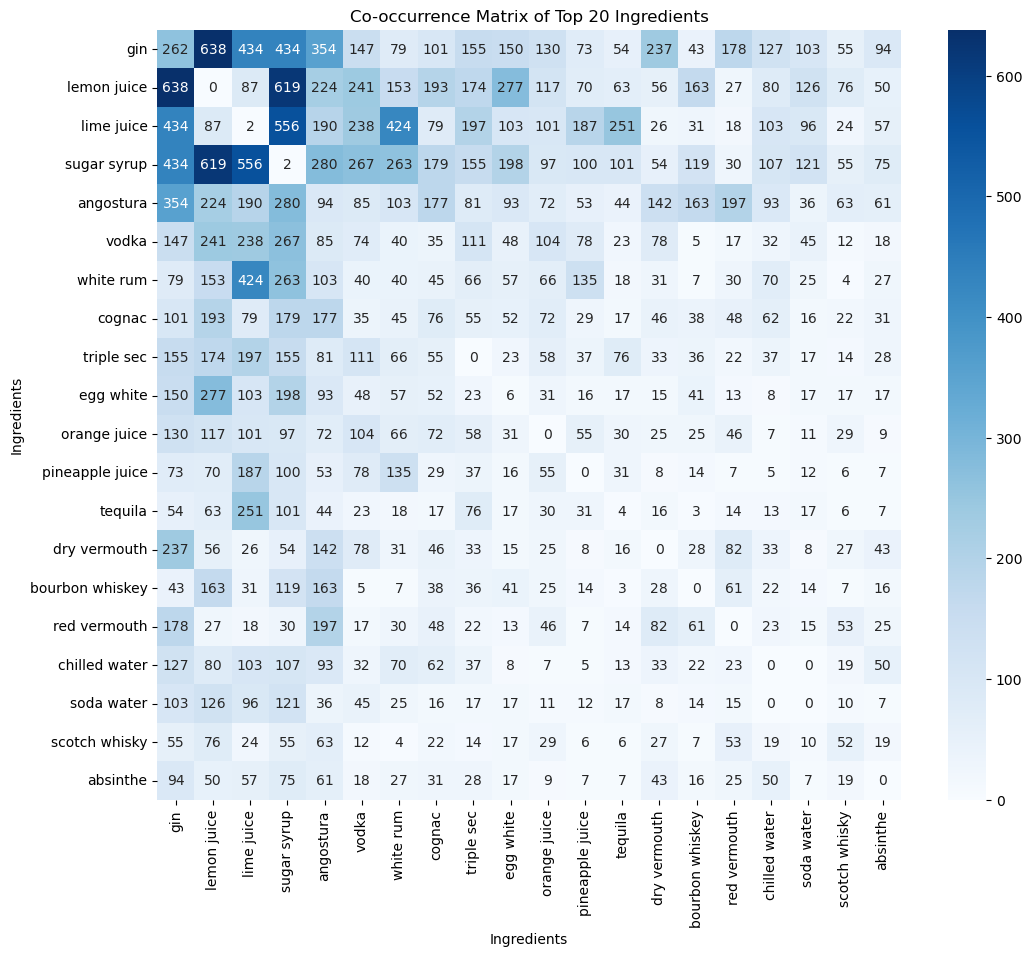

In [127]:
plt.figure(figsize=(12, 10))
sns.heatmap(truncated_matrix, cmap='Blues', annot=True, fmt='d')
plt.title('Co-occurrence Matrix of Top 20 Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Ingredients')
plt.show()